In [256]:
import numpy as np
import matplotlib.pyplot as plt

deg2rad = np.pi / 180.0
rad2deg = 180.0 / np.pi

R = 6.96e8
dt = 0.001
alpha = 6.048e13
dphi = 2*deg2rad
dtheta1_d = 2*3
dtheta2_d = 2
dtheta3_d = 2
tot_time = 365
N_steps = int(tot_time / dt)
save = 100
N_save = int(N_steps / save)+1
N_phi = int(2*np.pi/ dphi)
v_mer_max = 1.296e6
omega_max_deg = 13.38
omega_max = omega_max_deg*deg2rad

theta_1n = np.arange(5, 30, dtheta1_d)
theta_2n = np.arange(30, 60, dtheta2_d)
theta_3 = np.arange(60, 120, dtheta3_d)
theta_2s = np.arange(120, 150, dtheta2_d)
theta_1s = np.arange(150, 180 - 5, dtheta1_d)

print("theta_1n:", theta_1n.shape)
print("theta_2n:", theta_2n.shape)  
print("theta_3:", theta_3.shape)
print("theta_2s:", theta_2s.shape)
print("theta_1s:", theta_1s.shape)

N_theta = (len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s) + len(theta_1s))
theta_deg = np.concatenate((theta_1n, theta_2n, theta_3, theta_2s, theta_1s))

theta = theta_deg * deg2rad
dtheta1 = dtheta1_d * deg2rad
dtheta2 = dtheta2_d * deg2rad
dtheta3 = dtheta3_d * deg2rad

delta_x = R*np.min(np.sin(theta))*dphi
delta_y = R*dtheta3

stab_par = min((min(delta_x**2,delta_y**2))/(4*alpha), delta_y/v_mer_max, dphi/omega_max)
print(f"stab_par: {stab_par}")
assert dt <= stab_par, "Stability condition violated!!!!!!!!!!!"

phi = np.arange(0, 2 * np.pi, dphi)
Phi, Theta = np.meshgrid(phi, theta)

Phi_deg = Phi * rad2deg
Theta_deg = Theta * rad2deg

theta_1n: (5,)
theta_2n: (15,)
theta_3: (30,)
theta_2s: (15,)
theta_1s: (5,)
stab_par: 0.01853332956548756


In [257]:
(4*deg2rad)**2

0.004873878716587337

In [258]:
np.min(np.sin(theta))

np.float64(0.08715574274765817)

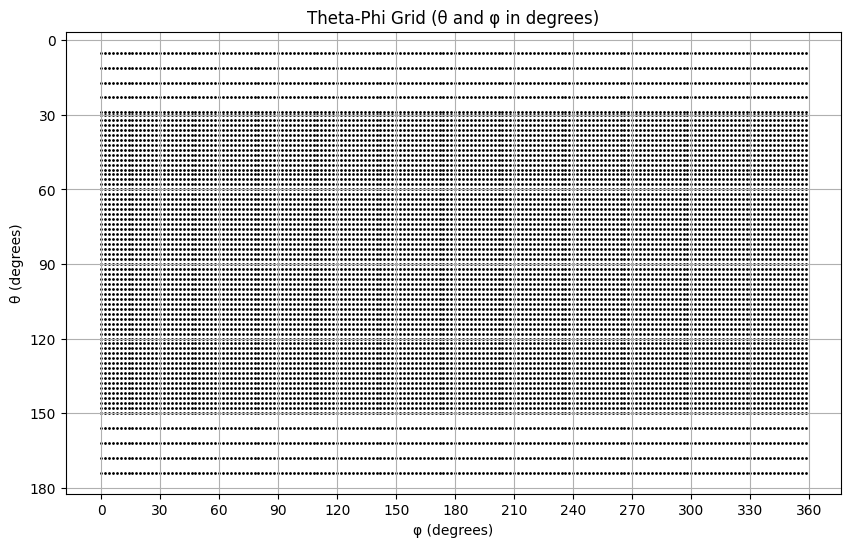

In [259]:
plt.figure(figsize=(10, 6))
plt.scatter(Phi_deg, Theta_deg, s=1, color='black')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.gca().invert_yaxis()
plt.title("Theta-Phi Grid (θ and φ in degrees)")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.show()

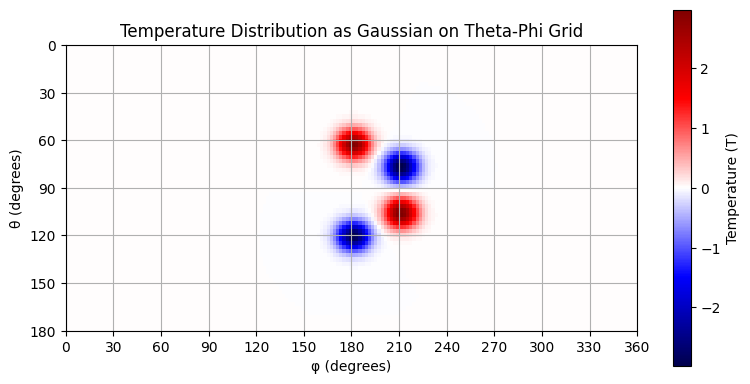

In [260]:
sigma_t = 5 * deg2rad
sigma_p = 7.07 * deg2rad 
T_plus_1 = 3*np.exp(-0.5*(((Theta - (9*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(6/6))/sigma_p)**2))
T_minus_1 = -3*np.exp(-0.5*(((Theta - (10.5*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(7/6))/sigma_p)**2))
T_plus_2 = 3*np.exp(-0.5*(((Theta - (13.5*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(7/6))/sigma_p)**2))
T_minus_2 = -3*np.exp(-0.5*(((Theta - (15*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(6/6))/sigma_p)**2))
T = T_plus_1 + T_minus_1 + T_plus_2 + T_minus_2
plt.figure(figsize=(8, 4))
plt.imshow(T, extent=(0, 360, 0, 180), aspect='equal', origin='lower', cmap='seismic')
plt.colorbar(label='Temperature (T)')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.gca().invert_yaxis()
plt.title("Temperature Distribution as Gaussian on Theta-Phi Grid")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.tight_layout()
plt.show()

In [261]:
N_phi, N_theta

(180, 70)

In [262]:
Phi.shape

(70, 180)

In [263]:
dtheta_rad = np.zeros(N_theta)
dtheta_rad[:len(theta_1n)] = dtheta1
dtheta_rad[len(theta_1n):len(theta_1n) + len(theta_2n)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n):len(theta_1n) + len(theta_2n) + len(theta_3)] = dtheta3
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3):len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s):] = dtheta1

In [264]:
dtheta_rad

array([0.10471976, 0.10471976, 0.10471976, 0.10471976, 0.10471976,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.10471976, 0.10471976, 0.10471976, 0.10471976, 0.10471976])

In [265]:
print(T.shape)
T = T.T
print(T.shape)

(70, 180)
(180, 70)


In [266]:
omega = omega_max - (2.3 * (np.cos(theta))**2 - 1.62* (np.cos(theta))**4) * deg2rad

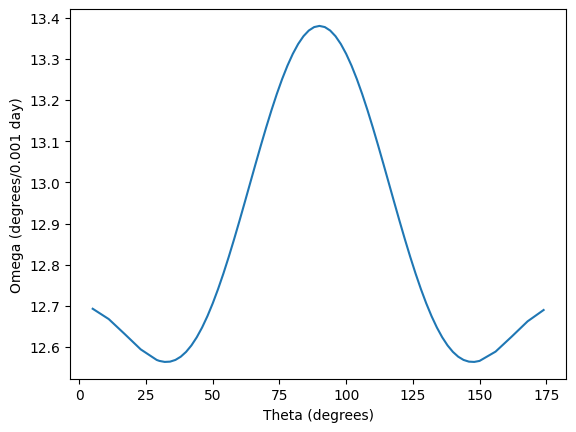

In [267]:
plt.plot(theta_deg, omega * rad2deg)
plt.xlabel("Theta (degrees)")
plt.ylabel(f"Omega (degrees/{dt} day)")
plt.show()

In [268]:
col = theta*rad2deg-90
v_mer = np.where(np.abs(col)<=75, v_mer_max * np.sin(np.pi * col / 75), 0)

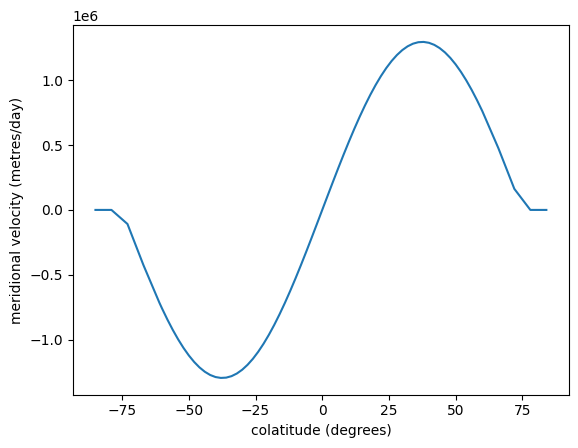

In [269]:
plt.plot(col, v_mer)
plt.xlabel("colatitude (degrees)")
plt.ylabel("meridional velocity (metres/day)")
plt.show()

In [270]:
cot = 1/np.tan(theta)
sin2 = (np.sin(theta))**2
senin = 1/(np.sin(theta))
cos = np.cos(theta)
sin = np.sin(theta)
all_values = np.zeros((N_save, N_phi, N_theta),dtype=np.float32)
all_values[0, :, :] = T
T_new = np.zeros_like(T)
T_new.shape

(180, 70)

In [271]:
accum_bottom = np.zeros(N_phi)
accum_top = np.zeros(N_phi)
save_idx = 0
all_values[save_idx, :, :]  = T
all_values[save_idx, :, 0]  = accum_bottom
all_values[save_idx, :, -1] = accum_top
save_idx += 1

In [272]:
C_phi_local = np.abs(omega) * dt / dphi
C_theta_local = np.abs(v_mer) * dt / (R * dtheta_rad)

print(f"Max C_phi = {np.max(C_phi_local):.4f}, Max C_theta = {np.max(C_theta_local):.4f}")

if np.max(C_phi_local) > 1.0 or np.max(C_theta_local) > 1.0:
    print("Warning: Local advection CFL > 1 — explicit scheme may become unstable.")


Max C_phi = 0.0067, Max C_theta = 0.0001


In [273]:
for n in range(1, N_steps + 1):
    # Slices for interior points (exclude ghost/BC rows/cols)
    i_sl = slice(1, -1)      # phi: 1 .. N_phi-2
    j_sl = slice(1, -1)      # theta: 1 .. N_theta-2

    # Convenience interior views
    Tc   = T[i_sl, j_sl]                 # center
    T_ip = T[2:,  j_sl]                  # i+1
    T_im = T[:-2, j_sl]                  # i-1
    T_jp = T[i_sl, 2:]                   # j+1
    T_jm = T[i_sl, :-2]                  # j-1

    # Precompute 1D theta-dependent arrays on interior (broadcast over i)
    dth     = dtheta_rad[1:-1]           # (N_theta-2,)
    inv_dth = 1.0 / dth
    inv_dth2= inv_dth**2
    sin_i   = sin[1:-1]
    sin2_i  = sin2[1:-1]
    cos_i   = cos[1:-1]
    cot_i   = cot[1:-1]
    omg_i   = omega[1:-1]
    v_i     = v_mer[1:-1]

    eps = 1e-1
    sin_i_safe  = np.maximum(sin_i,  eps)
    sin2_i_safe = np.maximum(sin2_i, eps**2)
    cot_i_safe = np.maximum(cot_i, eps)
    # ---- Diffusion (only for interior j; edges j==1 and j==N_theta-1 are excluded already) ----
    d2T_dtheta = (T_jp - 2.0 * Tc + T_jm) * inv_dth2
    cot_term   = cot_i_safe * ((Tc - T_jm) * inv_dth)          # cot(theta) * dT/dtheta (backward diff as in your code)
    d2T_dphi   = (T_ip - 2.0 * Tc + T_im) / (dphi**2)

    diffusion = (alpha / (R**2)) * dt * (d2T_dtheta + cot_term + (d2T_dphi / sin2_i_safe))

    # ---- Advection pieces ----
    # Common omega term (forward differencing in phi as in your code)
    advection_1 = dt * (-omg_i) * ((T_ip - Tc) / dphi)

    # Simple multiplicative term
    advection_2 = dt * (Tc * v_i * cos_i)

    # Upwind in theta based on sign of v_mer
    mask_neg = v_i < 0.0
    mask_pos = ~mask_neg

    advection_3 = np.zeros_like(Tc)
    # v<0  -> forward diff in theta (j+1 - j)
    if mask_neg.any():
        advection_3[:, mask_neg] = (
            dt * v_i[mask_neg] * sin_i_safe[mask_neg] * ((T_jp[:, mask_neg] - Tc[:, mask_neg]) * inv_dth[mask_neg])
        )
    # v>=0 -> backward diff in theta (j - j-1)
    if mask_pos.any():
        advection_3[:, mask_pos] = (
            dt * v_i[mask_pos] * sin_i_safe[mask_pos] * ((Tc[:, mask_pos] - T_jm[:, mask_pos]) * inv_dth[mask_pos])
        )

    # advection_4 uses theta-derivative of v_mer with same upwind choice
    dv_fwd = (v_mer[2:]   - v_mer[1:-1]) * inv_dth        # (N_theta-2,)
    dv_bwd = (v_mer[1:-1] - v_mer[:-2])  * inv_dth

    advection_4 = np.zeros_like(Tc)
    if mask_neg.any():
        advection_4[:, mask_neg] = dt * (-Tc[:, mask_neg] / R) * ( (1.0 / sin_i_safe[mask_neg]) * dv_fwd[mask_neg] )
    if mask_pos.any():
        advection_4[:, mask_pos] = dt * (-Tc[:, mask_pos] / R) * ( (1.0 / sin_i_safe[mask_pos]) * dv_bwd[mask_pos] )

    # Update interior
    T_new[i_sl, j_sl] = Tc + diffusion + advection_1 + advection_2 + advection_3 + advection_4

    # Diagnostics
    if np.any(np.isnan(T_new)) or np.any(np.isinf(T_new)):
        print(f"Numerical instability at step {n}")
        print(f"Max value in T_new: {np.nanmax(T_new)}, Min value: {np.nanmin(T_new)}")
        bad_indices = np.argwhere(~np.isfinite(T_new))
        print(f"Non-finite entries at indices (i,j): {bad_indices[:10]}")
        break

    # Periodic wrap in phi (copy your ghost-cell pattern)
    T_new[0,   1:-1] = T_new[-2, 1:-1]
    T_new[-1,  1:-1] = T_new[1,  1:-1]

    # Accumulators at theta boundaries (unchanged)
    accum_bottom += T_new[:, 1]
    accum_top    += T_new[:, -2]

    # Neumann-like in theta (copy edge from adjacent interior)
    T_new[1:-1, 0]  = T_new[1:-1, 1]
    T_new[1:-1, -1] = T_new[1:-1, -2]

    # Roll over & logging
    T = T_new.copy()
    if (n % 100) == 0:
        all_values[save_idx, :, :]  = T
        all_values[save_idx, :, 0]  = accum_bottom
        all_values[save_idx, :, -1] = accum_top
        save_idx += 1

Numerical instability at step 67
Max value in T_new: inf, Min value: -inf
Non-finite entries at indices (i,j): [[83 10]
 [83 11]
 [83 12]
 [83 58]
 [83 59]
 [83 60]
 [84  9]
 [84 10]
 [84 11]
 [84 12]]


/tmp/ipykernel_4662/3613939767.py:40: RuntimeWarning: overflow encountered in multiply
  advection_2 = dt * (Tc * v_i * cos_i)
/tmp/ipykernel_4662/3613939767.py:50: RuntimeWarning: overflow encountered in multiply
  dt * v_i[mask_neg] * sin_i_safe[mask_neg] * ((T_jp[:, mask_neg] - Tc[:, mask_neg]) * inv_dth[mask_neg])
/tmp/ipykernel_4662/3613939767.py:55: RuntimeWarning: overflow encountered in multiply
  dt * v_i[mask_pos] * sin_i_safe[mask_pos] * ((Tc[:, mask_pos] - T_jm[:, mask_pos]) * inv_dth[mask_pos])
/tmp/ipykernel_4662/3613939767.py:69: RuntimeWarning: invalid value encountered in add
  T_new[i_sl, j_sl] = Tc + diffusion + advection_1 + advection_2 + advection_3 + advection_4


In [274]:
all_values = np.transpose(all_values, (0, 2, 1))

In [ ]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
#vmin = np.min(all_values)
#vmax = np.max(all_values)
cax = ax.imshow(all_values[0], extent=[0, 360, 0, 180], aspect='equal', origin='lower', cmap='seismic', vmin=-5, vmax=5)
fig.colorbar(cax, label='Temperature')
ax.set_title('2D Heat Diffusion')
ax.set_ylabel('θ (degrees)')
ax.set_xlabel('φ (degrees)')
ax.set_xticks(np.arange(0, 361, 30))
ax.set_yticks(np.arange(0, 181, 15))
ax.grid(True)
ax.invert_yaxis()

def animate(frame):
    data = all_values[frame]
    ax.set_title(f'2D Heat Diffusion at t = {frame*dt*100:.2f} days')
    cax.set_data(data)
    return [cax]

ani = FuncAnimation(fig, animate, frames=N_save, interval=100, blit=True, repeat=False)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())

Animation size has reached 21005552 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
